# Regression Task: California Housing Price

Loading and pre-processing the dataset before applying the three regression models.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   No.                 1000 non-null   int64  
 1   longitude           1000 non-null   float64
 2   latitude            1000 non-null   float64
 3   housing_median_age  1000 non-null   int64  
 4   total_rooms         1000 non-null   int64  
 5   total_bedrooms      988 non-null    float64
 6   population          1000 non-null   int64  
 7   households          1000 non-null   int64  
 8   median_income       1000 non-null   float64
 9   median_house_value  1000 non-null   int64  
 10  ocean_proximity     993 non-null    object 
dtypes: float64(4), int64(6), object(1)
memory usage: 86.1+ KB
Dataset Overview:
 None

First few rows:
    No.  longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    1    -122.12     37.70                  17         2488           6

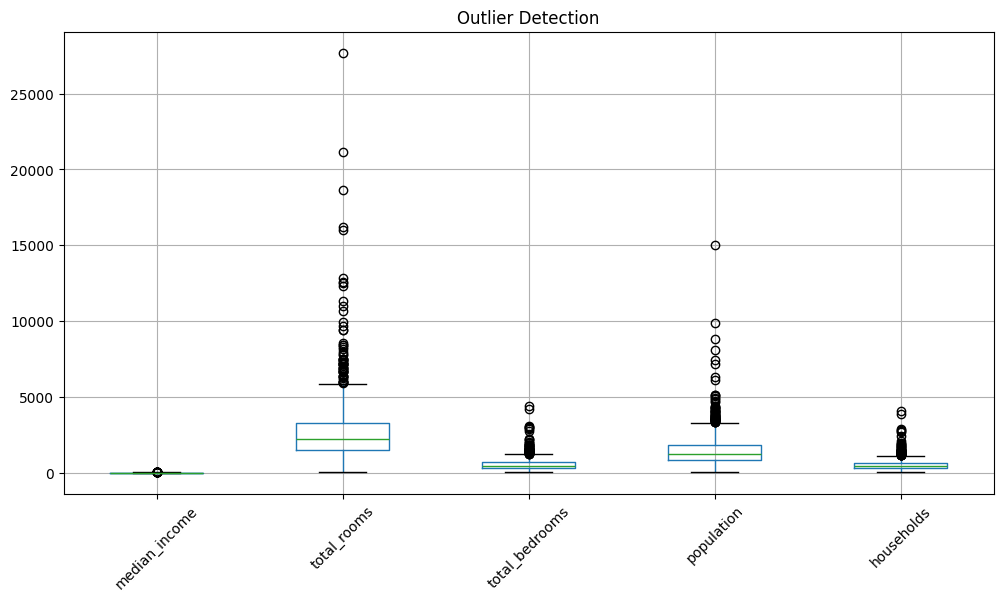

Train set: (729, 10), Validation set: (81, 10), Test set: (190, 10)
Cleaned dataset and processed datasets saved in 'processed_data/' successfully!


C:\Users\waele\AppData\Local\Temp\ipykernel_33608\735473596.py:32: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['total_bedrooms'].fillna(data['total_bedrooms'].median(), inplace=True)  # Median for numerical
C:\Users\waele\AppData\Local\Temp\ipykernel_33608\735473596.py:33: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we a

In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.metrics import mean_squared_error, r2_score

# Load the dataset
file_path = "COMP1816_Housing_Dataset_Regression.csv"  # Keep file path flexible
data = pd.read_csv(file_path)

# Display basic dataset information
print("Dataset Overview:\n", data.info())
print("\nFirst few rows:\n", data.head())

# Check for missing values
missing_values = data.isnull().sum()
print("\nMissing Values:\n", missing_values)

# Detect outliers using boxplots
plt.figure(figsize=(12,6))
data.boxplot(column=['median_income', 'total_rooms', 'total_bedrooms', 'population', 'households'])
plt.title("Outlier Detection")
plt.xticks(rotation=45)
plt.show()

# Fill missing values
data['total_bedrooms'].fillna(data['total_bedrooms'].median(), inplace=True)  # Median for numerical
data['ocean_proximity'].fillna(data['ocean_proximity'].mode()[0], inplace=True)  # Most frequent for categorical

# Create a folder for processed files if it doesn't exist
output_dir = "processed_data"
os.makedirs(output_dir, exist_ok=True)

# Save the cleaned dataset **EXACTLY like original file structure**
data.to_csv(os.path.join(output_dir, "COMP1816_Housing_Dataset_Cleaned.csv"), index=False)

# Preprocessing setup
numeric_features = ['longitude', 'latitude', 'housing_median_age',
                    'total_rooms', 'total_bedrooms', 'population',
                    'households', 'median_income']

numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),  # Handles missing values
    ('scaler', StandardScaler())  # Standardizes data
])

categorical_features = ['ocean_proximity']
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),  # Impute missing categorical values
    ('onehot', OneHotEncoder(handle_unknown='ignore'))  # Convert categorical to numerical
])

# Combine transformations
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# Split the dataset as required
X = data.drop('median_house_value', axis=1)
y = data['median_house_value']

# Ensure correct train-test split (last 190 rows for test)
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=810,
                                                    test_size=190,
                                                    shuffle=False)

# Further split train into training & validation sets (optional for model tuning)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.1, random_state=42)

# Save the processed datasets **inside the folder with original format & column arrangement**
X_train.to_csv(os.path.join(output_dir, "COMP1816_Housing_Train.csv"), index=False)
y_train.to_csv(os.path.join(output_dir, "COMP1816_Housing_Train_Target.csv"), index=False)
X_val.to_csv(os.path.join(output_dir, "COMP1816_Housing_Validation.csv"), index=False)
y_val.to_csv(os.path.join(output_dir, "COMP1816_Housing_Validation_Target.csv"), index=False)
X_test.to_csv(os.path.join(output_dir, "COMP1816_Housing_Test.csv"), index=False)
y_test.to_csv(os.path.join(output_dir, "COMP1816_Housing_Test_Target.csv"), index=False)

# Display final dataset shapes
print(f"Train set: {X_train.shape}, Validation set: {X_val.shape}, Test set: {X_test.shape}")
print(f"Cleaned dataset and processed datasets saved in '{output_dir}/' successfully!")


**Linear Regression**

Cross-validation R² scores: [0.62154322 0.60750235 0.55874388 0.53255913 0.6213888 ]
Mean Cross-validated R²: 0.5883

Linear Regression Predictions:
 [180946.77846767 258684.59085323 282454.07807981  41367.08395627
 279596.83426533 321211.59537319 209540.59733913 302963.8465739
 319871.9234041  244915.59751726 306748.66802695 322069.71251119
 400721.078547   315216.74852898 298804.19787214 266670.40801808
 373618.10421831 665359.65462134 358026.15014167 259243.32807775
 244154.67803171 307741.439576   246207.66598533 258535.29048327
 337301.26457915 282658.64499756 194590.70884765 226554.48185781
 185121.543272   195128.33275443 231202.84396176 242209.21468714
 259194.97951651 272526.76087375 305758.4872346  196941.75034837
 298981.84064985 191227.48878864 240822.35525905 292633.49614279
 327922.55525577 235147.96197034 234698.76986433 248627.5494408
 309530.88161041 280873.89480853 329140.61580679 147526.78440153
 344531.82039635 283654.32202855 271528.16657628 329334.46455061
 312472

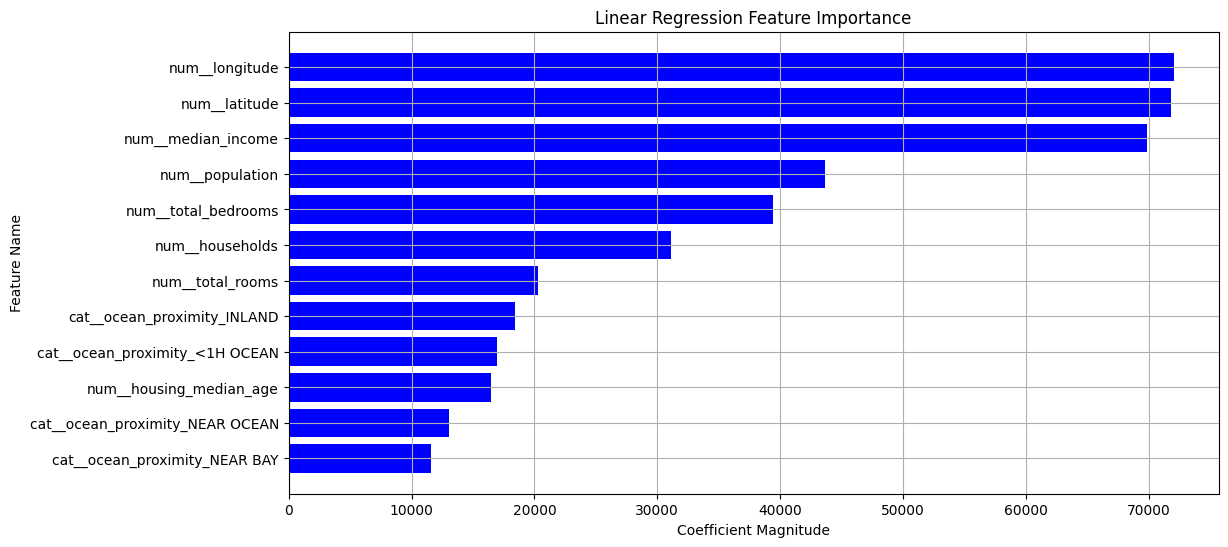

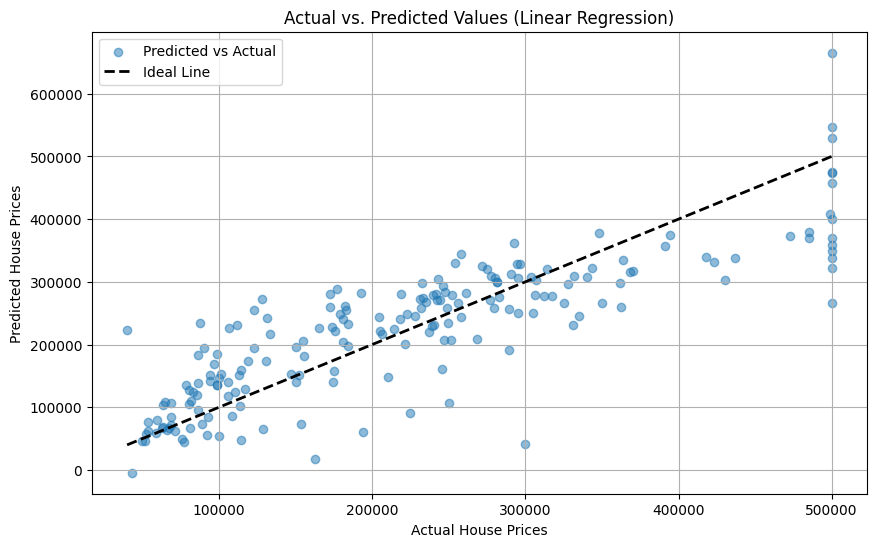

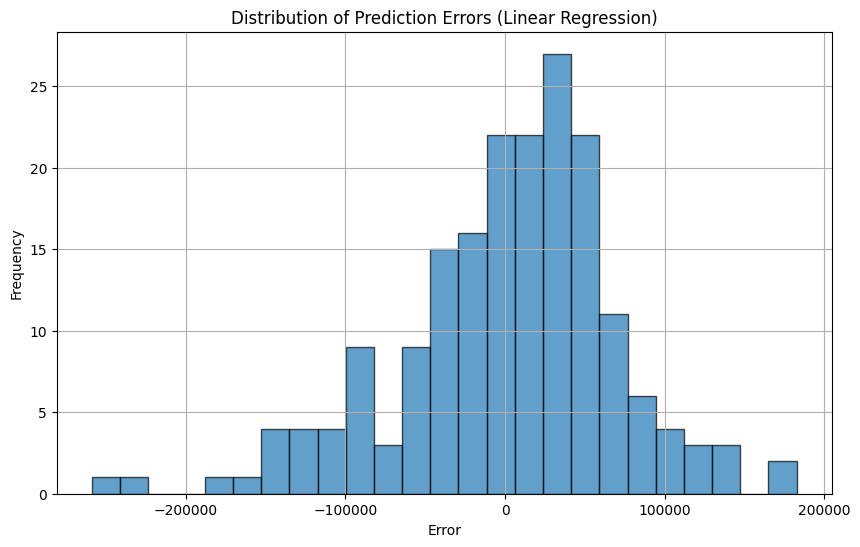


✅ Linear Regression Model Completed. Results saved in 'processed_data/'


In [45]:
# Import necessary libraries
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score, cross_val_predict
import matplotlib.pyplot as plt
import numpy as np
import os

# Ensure the processed_data folder exists
output_dir = "processed_data"
os.makedirs(output_dir, exist_ok=True)

# Linear Regression Model
linear_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                                  ('regressor', LinearRegression())])

# Fit the model on training data
linear_pipeline.fit(X_train, y_train)

# Cross-validation for better reliability
cv_scores = cross_val_score(linear_pipeline, X_train, y_train, cv=5, scoring='r2')
print(f"Cross-validation R² scores: {cv_scores}")
print(f"Mean Cross-validated R²: {np.mean(cv_scores):.4f}")

# Predictions
y_pred_linear = linear_pipeline.predict(X_test)

# Evaluation Metrics
mse_linear = mean_squared_error(y_test, y_pred_linear)
rmse_linear = np.sqrt(mse_linear)
r2_linear = r2_score(y_test, y_pred_linear)

print("\nLinear Regression Predictions:\n", y_pred_linear, "\n\nEvaluation:")
print(f"MSE: {mse_linear:.4f}, RMSE: {rmse_linear:.4f}, R²: {r2_linear:.4f}")

# Save predictions for documentation
pd.DataFrame({'Actual': y_test, 'Predicted': y_pred_linear}).to_csv(
    os.path.join(output_dir, "Linear_Regression_Predictions.csv"), index=False)

# **Feature Importance Extraction & Saving**
feature_names = preprocessor.get_feature_names_out()
coefficients = linear_pipeline.named_steps['regressor'].coef_

# Store feature importance
coef_df = pd.DataFrame({'Feature': feature_names, 'Coefficient': coefficients})
coef_df['Absolute Importance'] = coef_df['Coefficient'].abs()  # Taking absolute values for sorting
coef_df = coef_df.sort_values(by="Absolute Importance", ascending=False)  # Sort by importance

# Save feature importance
coef_df.to_csv(os.path.join(output_dir, "Linear_Regression_Feature_Importance.csv"), index=False)

# **Plot Feature Importance**
plt.figure(figsize=(12, 6))
plt.barh(coef_df['Feature'], coef_df['Absolute Importance'], color='blue')
plt.xlabel('Coefficient Magnitude')
plt.ylabel('Feature Name')
plt.title('Linear Regression Feature Importance')
plt.gca().invert_yaxis()
plt.grid()
plt.show()

# **Plot Actual vs. Predicted**
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_linear, alpha=0.5, label="Predicted vs Actual")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2, label="Ideal Line")  # Ideal line
plt.xlabel('Actual House Prices')
plt.ylabel('Predicted House Prices')
plt.title('Actual vs. Predicted Values (Linear Regression)')
plt.legend()
plt.grid()
plt.show()

# **Distribution of Errors - Evaluation**
errors = y_pred_linear - y_test
plt.figure(figsize=(10, 6))
plt.hist(errors, bins=25, edgecolor='black', alpha=0.7)
plt.xlabel('Error')
plt.ylabel('Frequency')
plt.title('Distribution of Prediction Errors (Linear Regression)')
plt.grid()
plt.show()

# Save evaluation metrics
metrics_data = {
    "MSE": [mse_linear],
    "RMSE": [rmse_linear],
    "R²": [r2_linear],
    "Mean Cross-validated R²": [np.mean(cv_scores)]
}
metrics_df = pd.DataFrame(metrics_data)
metrics_df.to_csv(os.path.join(output_dir, "Linear_Regression_Evaluation.csv"), index=False)

print("\n✅ Linear Regression Model Completed. Results saved in 'processed_data/'")


**Decision tree Regression**

Best Decision Tree Parameters: {'regressor__ccp_alpha': 0.0001, 'regressor__max_depth': 10, 'regressor__max_features': 'sqrt', 'regressor__min_samples_leaf': 5, 'regressor__min_samples_split': 5}
Cross-validation R² scores: [0.49318172 0.4334964  0.47667143 0.39561995 0.39100346]
Mean Cross-validated R²: 0.4380

Decision Tree Regression Predictions:
 [148642.85714286 196433.33333333 367040.         119100.
 367040.         237110.         152250.         171180.
 367040.         156183.33333333 367040.         367040.
 490820.8        311240.2        171180.         215685.71428571
 367040.         490820.8        307633.33333333 297016.83333333
 333433.44444444 367040.         201950.         237110.
 237110.         237110.          85914.28571429 170680.
 196433.33333333  85914.28571429 200387.5        201950.
 367040.         200387.5        367040.         196433.33333333
 277489.         170680.         297016.83333333 237110.
 277489.         196433.33333333 196433.33333333 2371

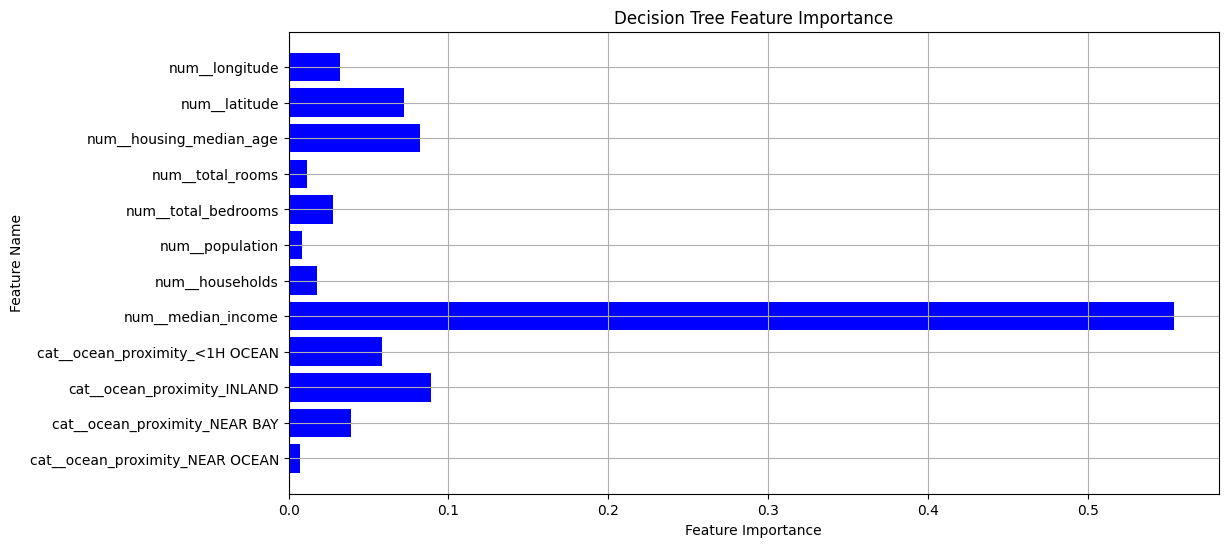

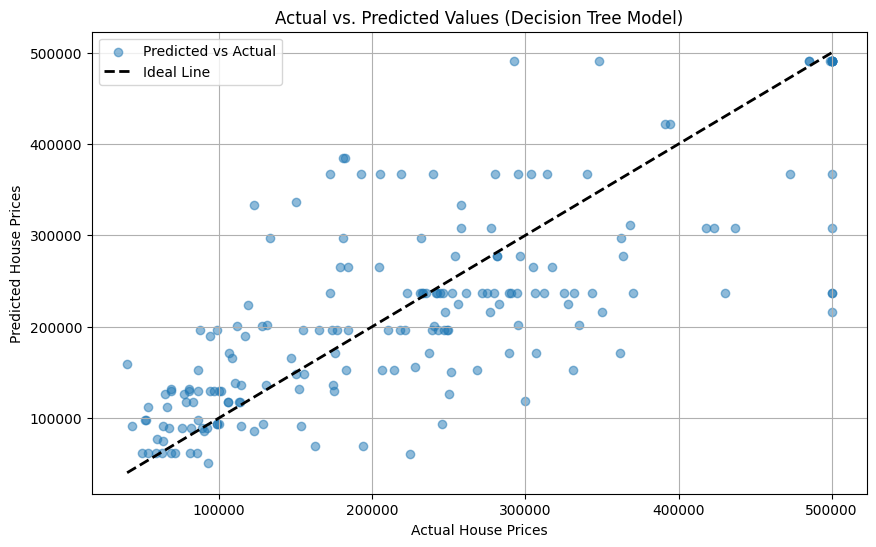

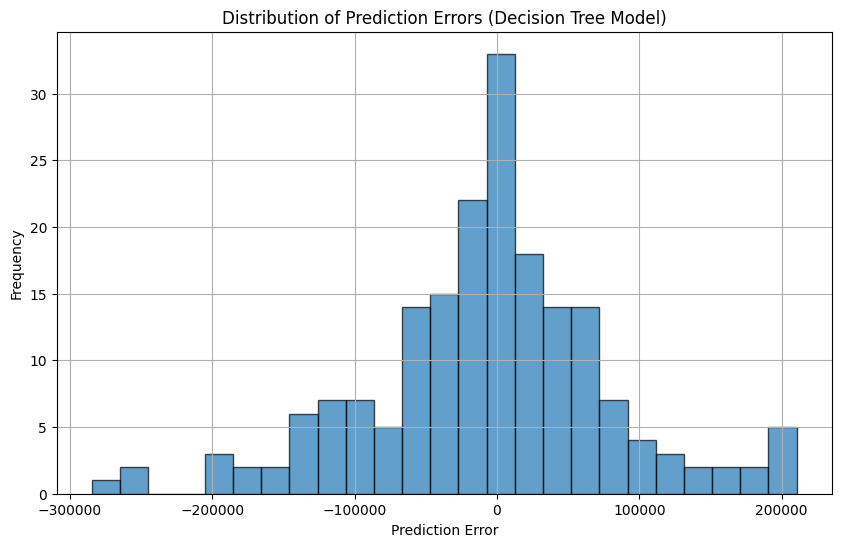


✅ Decision Tree Regression Model Completed. Results saved in 'processed_data/'


In [44]:
# Import necessary libraries
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV, cross_val_score
import matplotlib.pyplot as plt
import numpy as np
import os

# Ensure the processed_data folder exists
output_dir = "processed_data"
os.makedirs(output_dir, exist_ok=True)

# **Hyperparameter tuning**
param_grid = {
    'regressor__max_depth': [10],  # Best found depth
    'regressor__min_samples_split': [5, 10],  # Prevents overfitting, requires enough samples before splitting
    'regressor__min_samples_leaf': [5, 10],  # Avoids overfitting by ensuring leaves have enough samples
    'regressor__max_features': ['sqrt'],  # Uses only a subset of features at each split to improve generalization
    'regressor__ccp_alpha': [0.0001, 0.001, 0.01]  # Cost complexity pruning to remove weak splits
}

# Define the pipeline
tree_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                                ('regressor', DecisionTreeRegressor(random_state=42))])

# Run GridSearchCV for hyperparameter tuning
grid_search = GridSearchCV(tree_pipeline, param_grid, cv=5, scoring='r2', n_jobs=-1)
grid_search.fit(X_train, y_train)

# Select best model
best_tree_pipeline = grid_search.best_estimator_
print(f"Best Decision Tree Parameters: {grid_search.best_params_}")

# **Cross-validation scores**
cv_scores = cross_val_score(best_tree_pipeline, X_train, y_train, cv=5, scoring='r2')
print(f"Cross-validation R² scores: {cv_scores}")
print(f"Mean Cross-validated R²: {np.mean(cv_scores):.4f}")

# **Predictions**
y_pred_tree = best_tree_pipeline.predict(X_test)

# **Evaluation Metrics**
mse_tree = mean_squared_error(y_test, y_pred_tree)
rmse_tree = np.sqrt(mse_tree)
r2_tree = r2_score(y_test, y_pred_tree)

print("\nDecision Tree Regression Predictions:\n", y_pred_tree, "\n\nEvaluation:")
print(f"MSE: {mse_tree:.4f}, RMSE: {rmse_tree:.4f}, R²: {r2_tree:.4f}")

# **Save predictions for report writing**
pd.DataFrame({'Actual': y_test, 'Predicted': y_pred_tree}).to_csv(
    os.path.join(output_dir, "Decision_Tree_Predictions.csv"), index=False)

# **Feature Importance**
feature_names = preprocessor.get_feature_names_out()
feature_importance = best_tree_pipeline.named_steps['regressor'].feature_importances_

# Save feature importance
importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importance})
importance_df.to_csv(os.path.join(output_dir, "Decision_Tree_Feature_Importance.csv"), index=False)

# **Plot Feature Importance**
plt.figure(figsize=(12, 6))
plt.barh(importance_df['Feature'], importance_df['Importance'], color='blue')
plt.xlabel('Feature Importance')
plt.ylabel('Feature Name')
plt.title('Decision Tree Feature Importance')
plt.gca().invert_yaxis()
plt.grid()
plt.show()

# **Plot Actual vs. Predicted**
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_tree, alpha=0.5, label="Predicted vs Actual")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2, label="Ideal Line")
plt.xlabel('Actual House Prices')
plt.ylabel('Predicted House Prices')
plt.title('Actual vs. Predicted Values (Decision Tree Model)')
plt.legend()
plt.grid()
plt.show()

# **Distribution of Errors**
errors_tree = y_pred_tree - y_test
plt.figure(figsize=(10, 6))
plt.hist(errors_tree, bins=25, edgecolor='black', alpha=0.7)
plt.xlabel('Prediction Error')
plt.ylabel('Frequency')
plt.title('Distribution of Prediction Errors (Decision Tree Model)')
plt.grid()
plt.show()

# **Save evaluation metrics**
metrics_data = {
    "MSE": [mse_tree],
    "RMSE": [rmse_tree],
    "R²": [r2_tree],
    "Mean Cross-validated R²": [np.mean(cv_scores)]
}
metrics_df = pd.DataFrame(metrics_data)
metrics_df.to_csv(os.path.join(output_dir, "Decision_Tree_Evaluation.csv"), index=False)

print("\n✅ Decision Tree Regression Model Completed. Results saved in 'processed_data/'")


**Random Forest Regression**

C:\Users\waele\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\numpy\ma\core.py:2881: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


Best Random Forest Parameters: {'regressor__max_depth': None, 'regressor__max_features': 'sqrt', 'regressor__min_samples_leaf': 1, 'regressor__min_samples_split': 2, 'regressor__n_estimators': 200}
Cross-validation R² scores: [0.69126389 0.64342338 0.65176397 0.61037588 0.70226016]
Mean Cross-validated R²: 0.6598

Random Forest Regression Predictions:
 [181034.505 208019.    235359.045 168151.49  241009.555 238145.035
 193305.515 239423.025 318318.605 252854.01  279465.585 325019.17
 391564.785 249180.615 219401.04  239096.52  327990.6   376962.93
 312534.56  211154.52  260177.185 257553.11  206584.52  237622.54
 277331.53  241614.52  156311.505 170300.    158269.    143694.5
 164429.005 206303.5   256402.535 212247.555 266053.06  195139.5
 241408.55  172505.    221962.035 260024.015 336595.78  216740.51
 209500.515 229114.5   296746.52  251094.51  258467.015 208516.
 281022.06  254962.53  236089.    260123.03  267186.57  202837.
 242997.02  276918.015 340544.155 341592.645 320807.585 

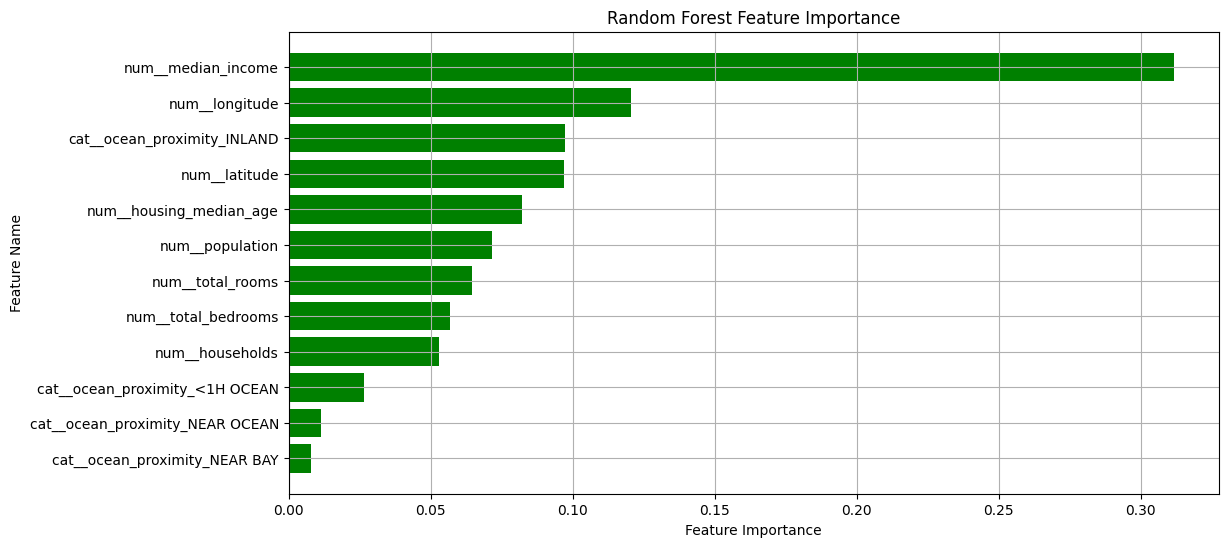

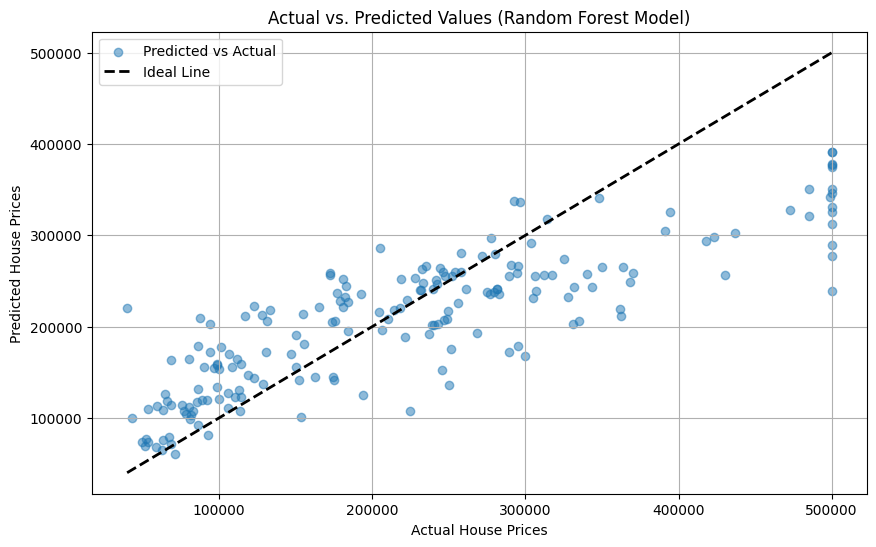

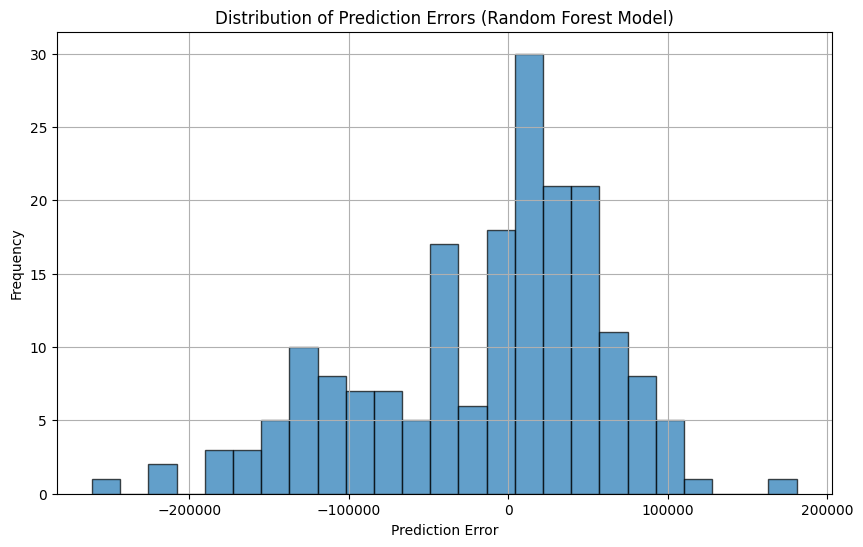


✅ Random Forest Regression Model Completed. Results saved in 'processed_data/'


In [46]:
# Import necessary libraries
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV, cross_val_score
import matplotlib.pyplot as plt
import numpy as np
import os

# Ensure the processed_data folder exists
output_dir = "processed_data"
os.makedirs(output_dir, exist_ok=True)

# **Hyperparameter Tuning with GridSearchCV**
param_grid = {
    'regressor__n_estimators': [100, 200],  # More trees = better performance but longer training
    'regressor__max_depth': [10, 20, None],  # Allow deep trees for better accuracy
    'regressor__min_samples_split': [2, 5],  # Prevents overfitting by requiring minimum samples before a split
    'regressor__min_samples_leaf': [1, 3, 5],  # Avoids small leaves that might cause overfitting
    'regressor__max_features': ['sqrt'],  # Uses a subset of features at each split for better generalization
}

# Define the pipeline
forest_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                                  ('regressor', RandomForestRegressor(random_state=42))])

# Run GridSearchCV for hyperparameter tuning
grid_search = GridSearchCV(forest_pipeline, param_grid, cv=5, scoring='r2', n_jobs=-1)
grid_search.fit(X_train, y_train)

# Select best model
best_forest_pipeline = grid_search.best_estimator_
print(f"Best Random Forest Parameters: {grid_search.best_params_}")

# **Cross-validation scores**
cv_scores = cross_val_score(best_forest_pipeline, X_train, y_train, cv=5, scoring='r2')
print(f"Cross-validation R² scores: {cv_scores}")
print(f"Mean Cross-validated R²: {np.mean(cv_scores):.4f}")

# **Predictions**
y_pred_forest = best_forest_pipeline.predict(X_test)

# **Evaluation Metrics**
mse_forest = mean_squared_error(y_test, y_pred_forest)
rmse_forest = np.sqrt(mse_forest)
r2_forest = r2_score(y_test, y_pred_forest)

print("\nRandom Forest Regression Predictions:\n", y_pred_forest, "\n\nEvaluation:")
print(f"MSE: {mse_forest:.4f}, RMSE: {rmse_forest:.4f}, R²: {r2_forest:.4f}")

# **Save predictions for report writing**
pd.DataFrame({'Actual': y_test, 'Predicted': y_pred_forest}).to_csv(
    os.path.join(output_dir, "Random_Forest_Predictions.csv"), index=False)

# **Feature Importance Extraction**
feature_names = preprocessor.get_feature_names_out()
feature_importance = best_forest_pipeline.named_steps['regressor'].feature_importances_

# Store feature importance
importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importance})
importance_df = importance_df.sort_values(by="Importance", ascending=False)  # Sort by importance
importance_df.to_csv(os.path.join(output_dir, "Random_Forest_Feature_Importance.csv"), index=False)

# **Plot Feature Importance**
plt.figure(figsize=(12, 6))
plt.barh(importance_df['Feature'], importance_df['Importance'], color='green')
plt.xlabel('Feature Importance')
plt.ylabel('Feature Name')
plt.title('Random Forest Feature Importance')
plt.gca().invert_yaxis()
plt.grid()
plt.show()

# **Plot Actual vs. Predicted**
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_forest, alpha=0.5, label="Predicted vs Actual")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2, label="Ideal Line")  # Ideal line
plt.xlabel('Actual House Prices')
plt.ylabel('Predicted House Prices')
plt.title('Actual vs. Predicted Values (Random Forest Model)')
plt.legend()
plt.grid()
plt.show()

# **Distribution of Errors**
errors_forest = y_pred_forest - y_test
plt.figure(figsize=(10, 6))
plt.hist(errors_forest, bins=25, edgecolor='black', alpha=0.7)
plt.xlabel('Prediction Error')
plt.ylabel('Frequency')
plt.title('Distribution of Prediction Errors (Random Forest Model)')
plt.grid()
plt.show()

# **Save evaluation metrics**
metrics_data = {
    "MSE": [mse_forest],
    "RMSE": [rmse_forest],
    "R²": [r2_forest],
    "Mean Cross-validated R²": [np.mean(cv_scores)]
}
metrics_df = pd.DataFrame(metrics_data)
metrics_df.to_csv(os.path.join(output_dir, "Random_Forest_Evaluation.csv"), index=False)

print("\n✅ Random Forest Regression Model Completed. Results saved in 'processed_data/'")


**Visual comparison of all three models**

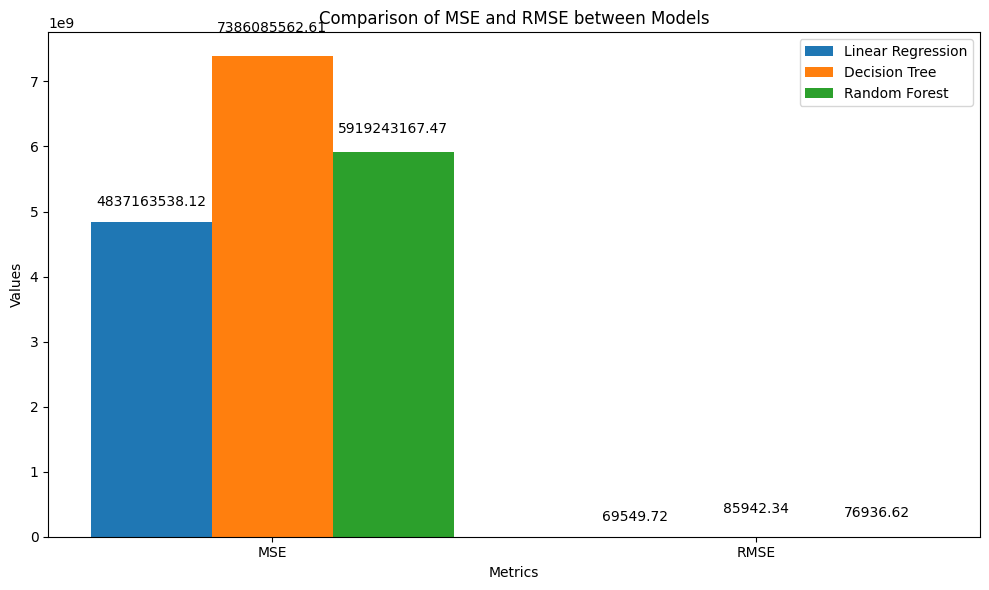

Logarithmic scale of the graph for better visualisation:


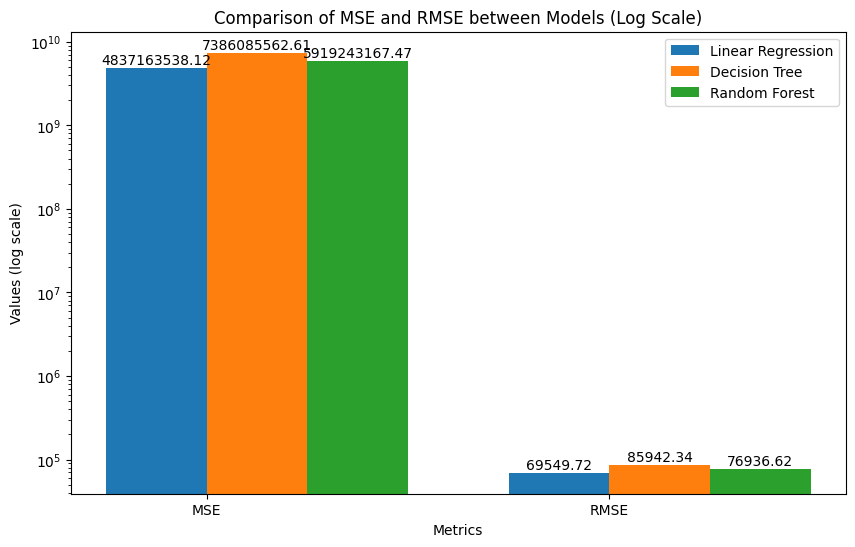

In [50]:
# Import necessary libraries
import matplotlib.pyplot as plt
import numpy as np

# Metrics for each model
values_linear = [mse_linear, rmse_linear]
values_tree = [mse_tree, rmse_tree]
values_forest = [mse_forest, rmse_forest]

# Labels for metrics and models
metrics = ['MSE', 'RMSE']
values = [values_linear, values_tree, values_forest]
labels = ['Linear Regression', 'Decision Tree', 'Random Forest']

x = np.arange(len(metrics))  # Label positions
width = 0.25  # Bar width

# **Plot 1: Standard Comparison**
fig, ax = plt.subplots(figsize=(10, 6))

# Plot bars with labels
for i in range(len(values)):
    ax.bar(x + i * width, values[i], width, label=labels[i])

# Formatting
ax.set_xlabel('Metrics')
ax.set_ylabel('Values')
ax.set_title('Comparison of MSE and RMSE between Models')
ax.set_xticks(x + width)
ax.set_xticklabels(metrics)
ax.legend()

# Show values on top of bars
for i in range(len(values)):
    for j in range(len(metrics)):
        ax.text(x[j] + i * width, values[i][j] + (0.05 * max(values[i])), 
                f"{values[i][j]:.2f}", ha='center', fontsize=10, color='black')

fig.tight_layout()
plt.show()

# **Plot 2: Logarithmic Scale (Zoomed-In)**
fig, ax = plt.subplots(figsize=(10, 6))

# Plot bars
for i in range(len(values)):
    ax.bar(x + i * width, values[i], width, label=labels[i])

# Apply logarithmic scale to better visualize differences
print("Logarithmic scale of the graph for better visualisation:")
ax.set_yscale('log')

# Formatting
ax.set_xlabel('Metrics')
ax.set_ylabel('Values (log scale)')
ax.set_title('Comparison of MSE and RMSE between Models (Log Scale)')
ax.set_xticks(x + width / 2)
ax.set_xticklabels(metrics)
ax.legend()

# Show values on top of bars
for i in range(len(values)):
    for j in range(len(metrics)):
        ax.text(x[j] + i * width, values[i][j] * 1.1, 
                f"{values[i][j]:.2f}", ha='center', fontsize=10, color='black')

plt.show()


# Classification Task: Titanic survivors 

In [77]:
# Import necessary libraries
import pandas as pd
import numpy as np
import os
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer

# Ensure processed_data folder exists
output_dir = "processed_data"
os.makedirs(output_dir, exist_ok=True)

# Load dataset
file_path = "COMP1816_Titanic_Dataset_Classification.csv"
data = pd.read_csv(file_path)

# **Fix column name to match dataset description**
data.rename(columns={"Ticket No.": "Ticket"}, inplace=True)

# **Fix Unrealistic Age Values (Cap between 0-100)**
data['Age'] = data['Age'].where(data['Age'].between(0, 100), np.nan)

# **Handle Missing Values Efficiently (No Row Deletion)**
fill_values = {
    'Pclass': data['Pclass'].mode()[0], 
    'Age': data['Age'].median(), 
    'SibSp': data['SibSp'].mode()[0],
    'Parch': data['Parch'].mode()[0],
    'Fare': data['Fare'].median(),
    'Embarked': data['Embarked'].mode()[0],
    'Survival': data['Survival'].mode()[0] if data['Survival'].isnull().sum() > 0 else None
}
data.fillna(fill_values, inplace=True)

# **Ensure dataset structure is not changed**
data = data[['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare', 'Embarked', 'Survival']]

# **Display dataset overview**
print("✅ Dataset Overview:\n", data.info())
print("\n✅ First Few Rows:\n", data.head())
print("\n✅ Missing Values:\n", data.isnull().sum())

# **Save cleaned dataset (structure unchanged)**
data.to_csv(os.path.join(output_dir, "COMP1816_Titanic_Dataset_Cleaned.csv"), index=False)

# **Split dataset (last 140 rows for test as per coursework spec)**
X = data.drop('Survival', axis=1)
y = data['Survival']

X_train, X_test, y_train, y_test = X[:-140], X[-140:], y[:-140], y[-140:]

# **Save the split datasets**
X_train.to_csv(os.path.join(output_dir, "COMP1816_Titanic_Train.csv"), index=False)
y_train.to_csv(os.path.join(output_dir, "COMP1816_Titanic_Train_Target.csv"), index=False)
X_test.to_csv(os.path.join(output_dir, "COMP1816_Titanic_Test.csv"), index=False)
y_test.to_csv(os.path.join(output_dir, "COMP1816_Titanic_Test_Target.csv"), index=False)

# **Preprocessing Pipeline**
# Identify numerical and categorical features
numerical_cols = ['Age', 'Fare', 'SibSp', 'Parch']
categorical_cols = ['Pclass', 'Sex', 'Embarked']

# **Numeric transformer**
numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),  
    ('scaler', StandardScaler())  
])

# **Categorical transformer**
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),  
    ('onehot', OneHotEncoder(handle_unknown='ignore'))  
])

# **Combine transformations**
preprocessor = ColumnTransformer(transformers=[
    ('num', numerical_transformer, numerical_cols),
    ('cat', categorical_transformer, categorical_cols)
])

# **Print dataset shapes to verify correctness**
print(f"\n✅ Train set: {X_train.shape}, Test set: {X_test.shape}")
print(f"✅ Cleaned dataset and processed datasets saved in '{output_dir}/' successfully!")


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 890 entries, 0 to 889
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  890 non-null    int64  
 1   Pclass       890 non-null    float64
 2   Name         885 non-null    object 
 3   Sex          890 non-null    object 
 4   Age          890 non-null    float64
 5   SibSp        890 non-null    float64
 6   Parch        890 non-null    float64
 7   Ticket       888 non-null    object 
 8   Fare         890 non-null    float64
 9   Embarked     890 non-null    object 
 10  Survival     890 non-null    float64
dtypes: float64(6), int64(1), object(4)
memory usage: 76.6+ KB
✅ Dataset Overview:
 None

✅ First Few Rows:
    PassengerId  Pclass                                          Name     Sex  \
0            1     3.0                       Braund, Mr. Owen Harris    male   
1            2     1.0                                           NaN  female   


**Random Forest Classification**

✅ Random Forest Classification Results
Accuracy: 0.8714285714285714

Confusion Matrix:
 [[82  8]
 [10 40]]

Classification Report:
               precision    recall  f1-score   support

         0.0       0.89      0.91      0.90        90
         1.0       0.83      0.80      0.82        50

    accuracy                           0.87       140
   macro avg       0.86      0.86      0.86       140
weighted avg       0.87      0.87      0.87       140



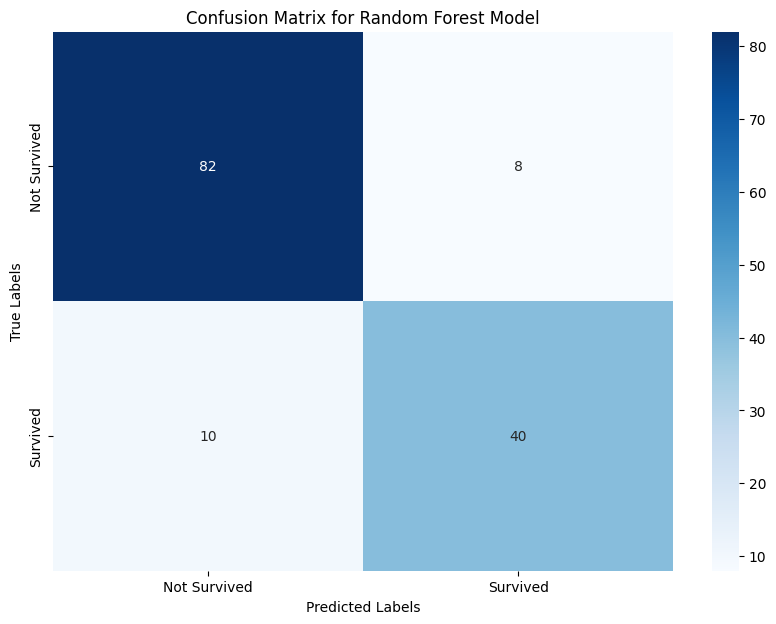

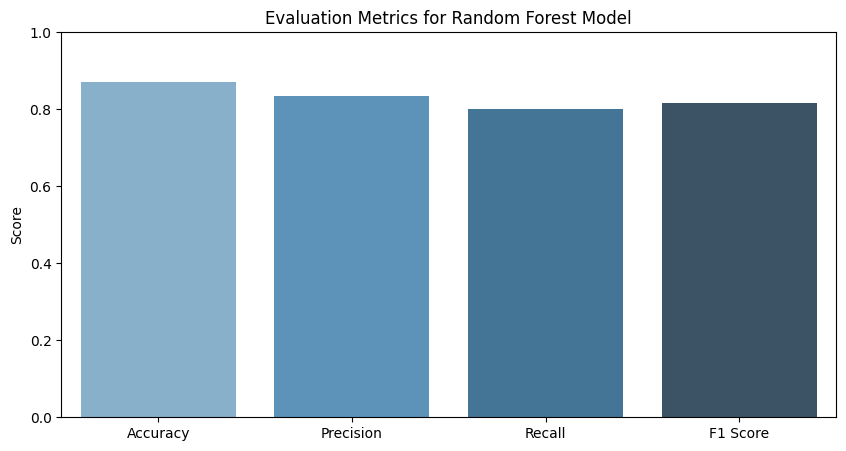


✅ Random Forest Model Completed. Results saved in 'processed_data/'


In [80]:
# Import necessary libraries
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import os

# Ensure processed_data folder exists
output_dir = "processed_data"
os.makedirs(output_dir, exist_ok=True)

# **Load preprocessed Titanic dataset**
X_train = pd.read_csv(os.path.join(output_dir, "COMP1816_Titanic_Train.csv"))
y_train = pd.read_csv(os.path.join(output_dir, "COMP1816_Titanic_Train_Target.csv")).values.ravel()
X_test = pd.read_csv(os.path.join(output_dir, "COMP1816_Titanic_Test.csv"))
y_test = pd.read_csv(os.path.join(output_dir, "COMP1816_Titanic_Test_Target.csv")).values.ravel()

# **Define Random Forest Model**
rf_model = RandomForestClassifier(
    n_estimators=200, 
    max_depth=None,  
    min_samples_split=2,  
    min_samples_leaf=1,  
    random_state=42  
)

# **Create and Fit the Pipeline**
pipeline = Pipeline(steps=[('preprocessor', preprocessor), ('model', rf_model)])
pipeline.fit(X_train, y_train)

# **Predictions**
pred_rf = pipeline.predict(X_test)

# **Save Predictions**
pd.DataFrame({'Actual': y_test, 'Predicted': pred_rf}).to_csv(
    os.path.join(output_dir, "Random_Forest_Predictions.csv"), index=False
)

# **Evaluation Metrics**
rf_accuracy = accuracy_score(y_test, pred_rf)
rf_conf_matrix = confusion_matrix(y_test, pred_rf)
rf_report = classification_report(y_test, pred_rf)

# **Save Evaluation Metrics**
metrics_data = {
    "Accuracy": [rf_accuracy],
    "Precision": [precision_score(y_test, pred_rf)],
    "Recall": [recall_score(y_test, pred_rf)],
    "F1 Score": [f1_score(y_test, pred_rf)]
}
pd.DataFrame(metrics_data).to_csv(os.path.join(output_dir, "Random_Forest_Evaluation.csv"), index=False)

# **Print Results**
print("✅ Random Forest Classification Results")
print("Accuracy:", rf_accuracy)
print("\nConfusion Matrix:\n", rf_conf_matrix)
print("\nClassification Report:\n", rf_report)

# **Plot Confusion Matrix**
plt.figure(figsize=(10, 7))
sns.heatmap(rf_conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Not Survived', 'Survived'], yticklabels=['Not Survived', 'Survived'])
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix for Random Forest Model')
plt.show()

# **Fix FutureWarning in Seaborn**
metrics = ['Accuracy', 'Precision', 'Recall', 'F1 Score']
values = [rf_accuracy, precision_score(y_test, pred_rf), recall_score(y_test, pred_rf), f1_score(y_test, pred_rf)]

plt.figure(figsize=(10, 5))
sns.barplot(x=metrics, y=values, hue=metrics, dodge=False, palette="Blues_d")  # Fixes warning
plt.title('Evaluation Metrics for Random Forest Model')
plt.ylim(0, 1)
plt.ylabel('Score')
plt.legend([],[], frameon=False)  # Removes unnecessary legend
plt.show()

print("\n✅ Random Forest Model Completed. Results saved in 'processed_data/'")


**Gradient Boosting Classification**

✅ Gradient Boosting Classification Results
Accuracy: 0.8642857142857143

Confusion Matrix:
 [[81  9]
 [10 40]]

Classification Report:
               precision    recall  f1-score   support

         0.0       0.89      0.90      0.90        90
         1.0       0.82      0.80      0.81        50

    accuracy                           0.86       140
   macro avg       0.85      0.85      0.85       140
weighted avg       0.86      0.86      0.86       140



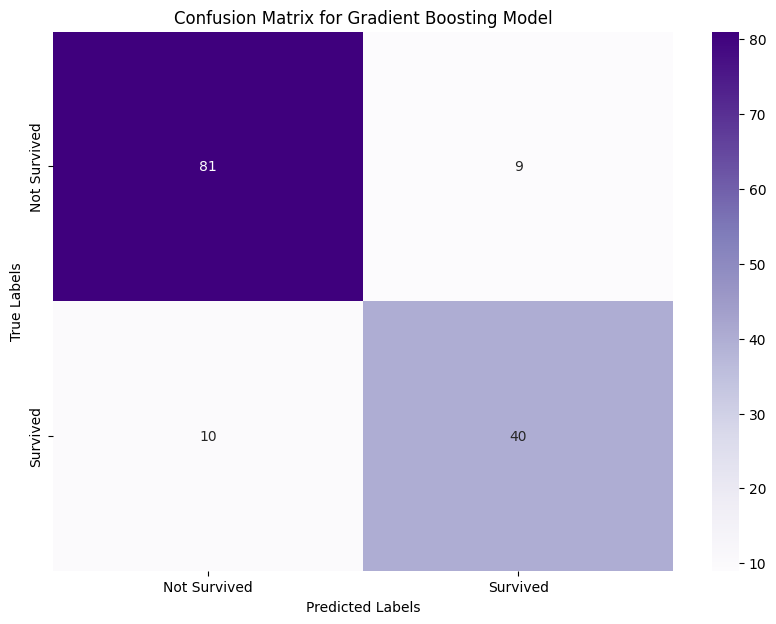

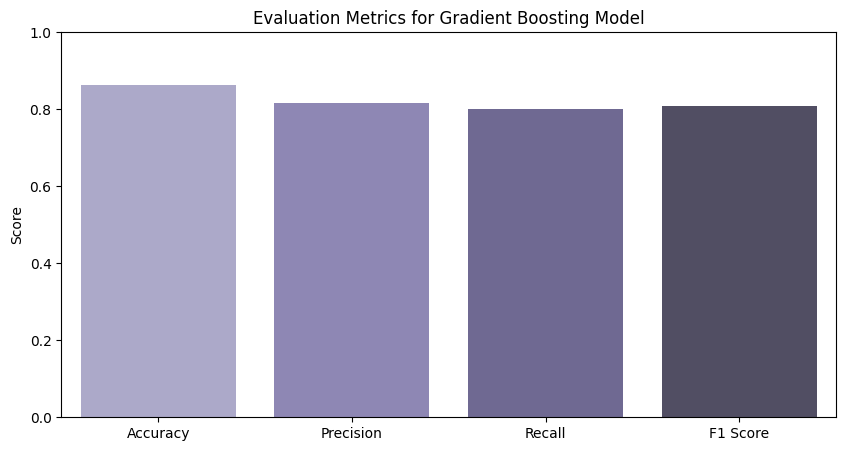


✅ Gradient Boosting Model Completed. Results saved in 'processed_data/'


In [81]:
# Import necessary libraries
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import os

# Ensure processed_data folder exists
output_dir = "processed_data"
os.makedirs(output_dir, exist_ok=True)

# **Load preprocessed Titanic dataset**
X_train = pd.read_csv(os.path.join(output_dir, "COMP1816_Titanic_Train.csv"))
y_train = pd.read_csv(os.path.join(output_dir, "COMP1816_Titanic_Train_Target.csv")).values.ravel()
X_test = pd.read_csv(os.path.join(output_dir, "COMP1816_Titanic_Test.csv"))
y_test = pd.read_csv(os.path.join(output_dir, "COMP1816_Titanic_Test_Target.csv")).values.ravel()

# **Define Gradient Boosting Model**
gb_model = GradientBoostingClassifier(
    n_estimators=200,  # Increase estimators for better performance
    learning_rate=0.1,  # Standard learning rate
    max_depth=3,  # Limits tree depth to avoid overfitting
    random_state=42
)

# **Create and Fit the Pipeline**
pipeline = Pipeline(steps=[('preprocessor', preprocessor), ('model', gb_model)])
pipeline.fit(X_train, y_train)

# **Predictions**
pred_gb = pipeline.predict(X_test)

# **Save Predictions**
pd.DataFrame({'Actual': y_test, 'Predicted': pred_gb}).to_csv(
    os.path.join(output_dir, "Gradient_Boosting_Predictions.csv"), index=False
)

# **Evaluation Metrics**
gb_accuracy = accuracy_score(y_test, pred_gb)
gb_conf_matrix = confusion_matrix(y_test, pred_gb)
gb_report = classification_report(y_test, pred_gb)

# **Save Evaluation Metrics**
metrics_data = {
    "Accuracy": [gb_accuracy],
    "Precision": [precision_score(y_test, pred_gb)],
    "Recall": [recall_score(y_test, pred_gb)],
    "F1 Score": [f1_score(y_test, pred_gb)]
}
pd.DataFrame(metrics_data).to_csv(os.path.join(output_dir, "Gradient_Boosting_Evaluation.csv"), index=False)

# **Print Results**
print("✅ Gradient Boosting Classification Results")
print("Accuracy:", gb_accuracy)
print("\nConfusion Matrix:\n", gb_conf_matrix)
print("\nClassification Report:\n", gb_report)

# **Plot Confusion Matrix**
plt.figure(figsize=(10, 7))
sns.heatmap(gb_conf_matrix, annot=True, fmt='d', cmap='Purples',
            xticklabels=['Not Survived', 'Survived'], yticklabels=['Not Survived', 'Survived'])
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix for Gradient Boosting Model')
plt.show()

# **Fix Seaborn FutureWarning**
gb_metrics = ['Accuracy', 'Precision', 'Recall', 'F1 Score']
gb_values = [gb_accuracy, precision_score(y_test, pred_gb), recall_score(y_test, pred_gb), f1_score(y_test, pred_gb)]

plt.figure(figsize=(10, 5))
sns.barplot(x=gb_metrics, y=gb_values, hue=gb_metrics, dodge=False, palette="Purples_d")  # Fixes warning
plt.title('Evaluation Metrics for Gradient Boosting Model')
plt.ylim(0, 1)
plt.ylabel('Score')
plt.legend([],[], frameon=False)  # Removes unnecessary legend
plt.show()

print("\n✅ Gradient Boosting Model Completed. Results saved in 'processed_data/'")


**Logistic Regression Classification**

✅ Logistic Regression Classification Results
Accuracy: 0.8428571428571429

Confusion Matrix:
 [[82  8]
 [14 36]]

Classification Report:
               precision    recall  f1-score   support

         0.0       0.85      0.91      0.88        90
         1.0       0.82      0.72      0.77        50

    accuracy                           0.84       140
   macro avg       0.84      0.82      0.82       140
weighted avg       0.84      0.84      0.84       140



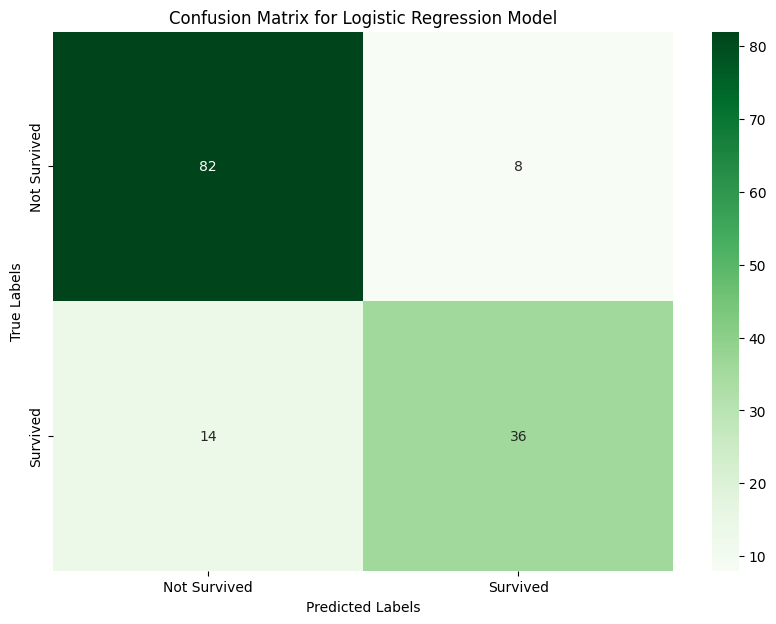

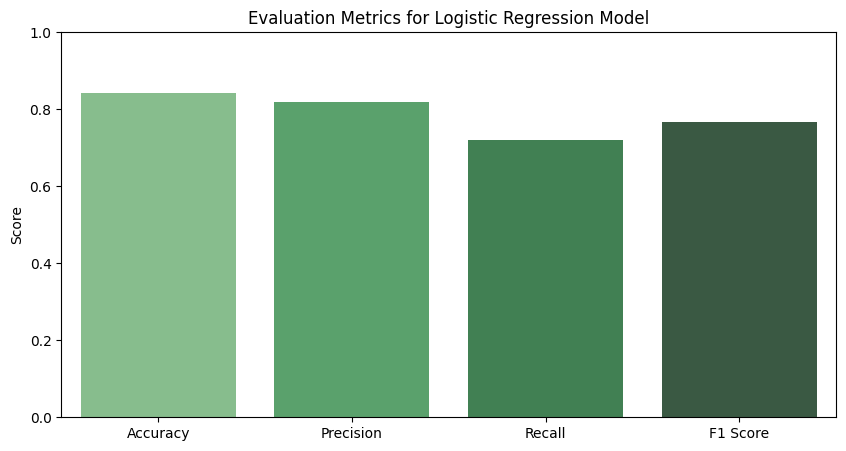


✅ Logistic Regression Model Completed. Results saved in 'processed_data/'


In [82]:
# Import necessary libraries
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import os

# Ensure processed_data folder exists
output_dir = "processed_data"
os.makedirs(output_dir, exist_ok=True)

# **Load preprocessed Titanic dataset**
X_train = pd.read_csv(os.path.join(output_dir, "COMP1816_Titanic_Train.csv"))
y_train = pd.read_csv(os.path.join(output_dir, "COMP1816_Titanic_Train_Target.csv")).values.ravel()
X_test = pd.read_csv(os.path.join(output_dir, "COMP1816_Titanic_Test.csv"))
y_test = pd.read_csv(os.path.join(output_dir, "COMP1816_Titanic_Test_Target.csv")).values.ravel()

# **Define Logistic Regression Model**
log_model = LogisticRegression(
    solver='liblinear',  # Best for small datasets
    max_iter=500,  # Ensures convergence
    random_state=42
)

# **Create and Fit the Pipeline**
pipeline = Pipeline(steps=[('preprocessor', preprocessor), ('model', log_model)])
pipeline.fit(X_train, y_train)

# **Predictions**
pred_log = pipeline.predict(X_test)

# **Save Predictions**
pd.DataFrame({'Actual': y_test, 'Predicted': pred_log}).to_csv(
    os.path.join(output_dir, "Logistic_Regression_Predictions.csv"), index=False
)

# **Evaluation Metrics**
log_accuracy = accuracy_score(y_test, pred_log)
log_conf_matrix = confusion_matrix(y_test, pred_log)
log_report = classification_report(y_test, pred_log)

# **Save Evaluation Metrics**
metrics_data = {
    "Accuracy": [log_accuracy],
    "Precision": [precision_score(y_test, pred_log)],
    "Recall": [recall_score(y_test, pred_log)],
    "F1 Score": [f1_score(y_test, pred_log)]
}
pd.DataFrame(metrics_data).to_csv(os.path.join(output_dir, "Logistic_Regression_Evaluation.csv"), index=False)

# **Print Results**
print("✅ Logistic Regression Classification Results")
print("Accuracy:", log_accuracy)
print("\nConfusion Matrix:\n", log_conf_matrix)
print("\nClassification Report:\n", log_report)

# **Plot Confusion Matrix**
plt.figure(figsize=(10, 7))
sns.heatmap(log_conf_matrix, annot=True, fmt='d', cmap='Greens',
            xticklabels=['Not Survived', 'Survived'], yticklabels=['Not Survived', 'Survived'])
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix for Logistic Regression Model')
plt.show()

# **Fix Seaborn FutureWarning**
log_metrics = ['Accuracy', 'Precision', 'Recall', 'F1 Score']
log_values = [log_accuracy, precision_score(y_test, pred_log), recall_score(y_test, pred_log), f1_score(y_test, pred_log)]

plt.figure(figsize=(10, 5))
sns.barplot(x=log_metrics, y=log_values, hue=log_metrics, dodge=False, palette="Greens_d")  # Fixes warning
plt.title('Evaluation Metrics for Logistic Regression Model')
plt.ylim(0, 1)
plt.ylabel('Score')
plt.legend([],[], frameon=False)  # Removes unnecessary legend
plt.show()

print("\n✅ Logistic Regression Model Completed. Results saved in 'processed_data/'")


**Visual comparisons of all three models**

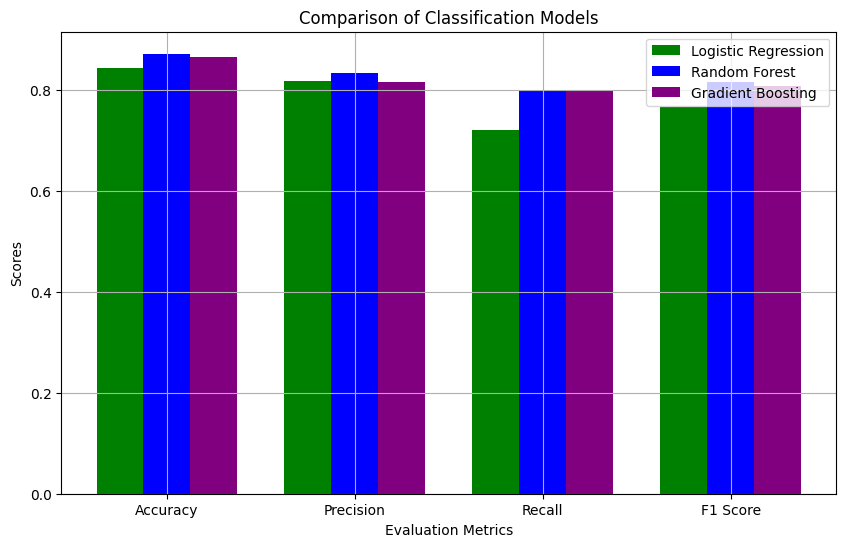

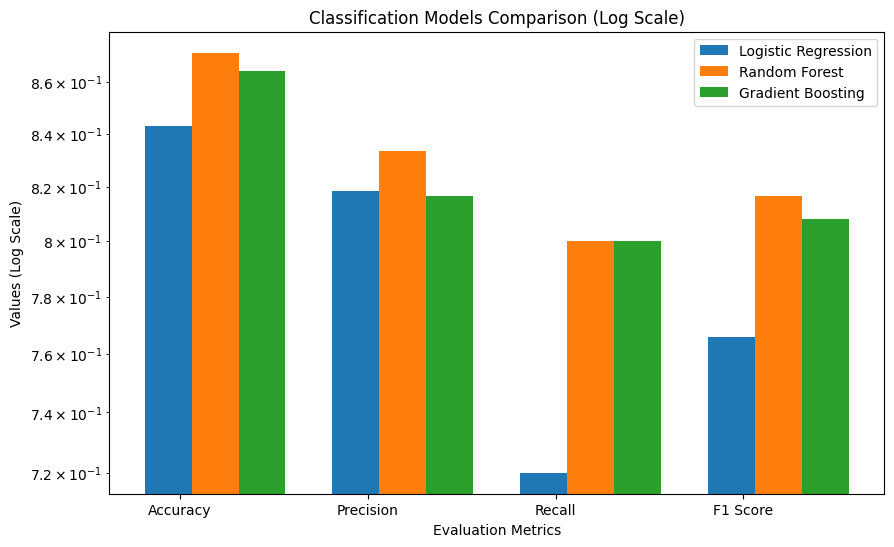

In [83]:
# Import necessary libraries
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import os
import pandas as pd

# **Ensure processed_data folder exists**
output_dir = "processed_data"

# **Load evaluation results from saved CSVs**
rf_metrics = pd.read_csv(os.path.join(output_dir, "Random_Forest_Evaluation.csv"))
gb_metrics = pd.read_csv(os.path.join(output_dir, "Gradient_Boosting_Evaluation.csv"))
log_metrics = pd.read_csv(os.path.join(output_dir, "Logistic_Regression_Evaluation.csv"))

# **Extract values for plotting**
metrics = ['Accuracy', 'Precision', 'Recall', 'F1 Score']
values_rf = rf_metrics.values.flatten()
values_gb = gb_metrics.values.flatten()
values_log = log_metrics.values.flatten()

# **Plot the comparison (Bar Chart)**
x = np.arange(len(metrics))  # Label locations
width = 0.25  # Width of bars

fig, ax = plt.subplots(figsize=(10, 6))

# **Plot bars for each model**
ax.bar(x - width, values_log, width, label='Logistic Regression', color='green')
ax.bar(x, values_rf, width, label='Random Forest', color='blue')
ax.bar(x + width, values_gb, width, label='Gradient Boosting', color='purple')

# **Formatting the graph**
ax.set_xlabel('Evaluation Metrics')
ax.set_ylabel('Scores')
ax.set_title('Comparison of Classification Models')
ax.set_xticks(x)
ax.set_xticklabels(metrics)
ax.legend()
ax.grid()

plt.show()

# **Fix Seaborn FutureWarning & Provide Logarithmic Scale**
fig, ax = plt.subplots(figsize=(10, 6))

for i, values in enumerate([values_log, values_rf, values_gb]):
    ax.bar(x + i * width, values, width, label=['Logistic Regression', 'Random Forest', 'Gradient Boosting'][i])

ax.set_yscale('log')  # Log scale for better visualization
ax.set_xlabel('Evaluation Metrics')
ax.set_ylabel('Values (Log Scale)')
ax.set_title('Classification Models Comparison (Log Scale)')
ax.set_xticks(x + width / len(metrics))
ax.set_xticklabels(metrics)
ax.legend()

plt.show()
